### Solving  :
##### primal : min_x( F(Kx) + G(x)) 
##### dual : max_y (-F*(y) - G*(-K_t y))

### Chambolle pock for 
min ||P*x - d||_2^2 + Lambda*TV(x)

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from random import randrange
from skimage.data import shepp_logan_phantom
from skimage import color
from skimage import io
from skimage.transform import radon, rescale
import os
from filters import sensing_matrix
import scipy
from tqdm import tqdm

import pywt

In [4]:
#image = rescale(color.rgb2gray(plt.imread("spherical.jpg")), scale=0.20, mode="reflect")
image = rescale(color.rgb2gray(plt.imread("lena.png")), scale=0.10, mode="reflect")
i, j = np.shape(image)
n = i*j
r = 1
m = int(n/r)
A = np.array(sensing_matrix(m, n, "bernoulli"))
X = np.array(image.reshape(n, 1))
R = np.matmul(A, X)

theta = np.linspace(0., 180., max(image.shape), endpoint=False)
X2 = np.array(image.reshape(n, 1)).reshape(51, 51)
A2 = radon(image, theta=theta)
R2 = np.matmul(A2, X2)

print('shape of image : %s \nshape of A : %s \nshape of R : %s' %(np.shape(image),np.shape(A), np.shape(R)))

shape of image : (51, 51) 
shape of A : (2601, 2601) 
shape of R : (2601, 1)


C:\ProgramData\Anaconda3\lib\site-packages\skimage\transform\radon_transform.py:83: UserWarning: Radon transform: image must be zero outside the reconstruction circle
  warn('Radon transform: image must be zero outside the '


### wavelet thingy

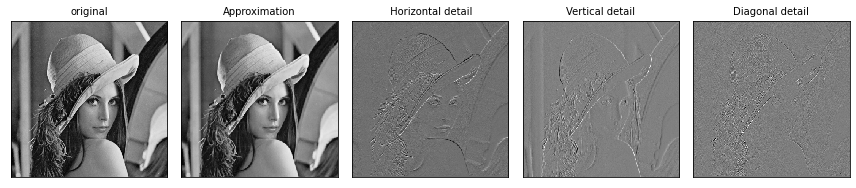

(512, 512)
(256, 256) (256, 256) (256, 256) (256, 256)


In [6]:
image_test = rescale(color.rgb2gray(plt.imread("lena.png")), scale=1.0, mode="reflect")
titles = ['Approximation', ' Horizontal detail',
          'Vertical detail', 'Diagonal detail']

coeffs2 = pywt.dwt2(image_test, 'haar')
LL, (LH, HL, HH) = coeffs2
fig = plt.figure(figsize=(12, 3))

ax = fig.add_subplot(1, 5, 1)
ax.imshow(image_test, interpolation="nearest", cmap=plt.cm.gray)
ax.set_title('original', fontsize=10)
ax.set_xticks([])
ax.set_yticks([])

for i, a in enumerate([LL, LH, HL, HH]):
    ax = fig.add_subplot(1, 5, i + 2)
    ax.imshow(a, interpolation="nearest", cmap=plt.cm.gray)
    ax.set_title(titles[i], fontsize=10)
    ax.set_xticks([])
    ax.set_yticks([])



fig.tight_layout()
plt.show()
print(np.shape(image_test))
print(np.shape(LL), np.shape(LH), np.shape(HL), np.shape(HH))

### 2 level

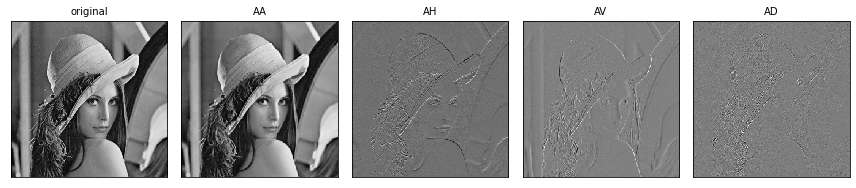

(256, 256) (256, 256) (256, 256) (256, 256)


In [7]:
image_test = rescale(color.rgb2gray(plt.imread("lena.png")), scale=1.0, mode="reflect")
titles = ['AA', 'AH', 'AV', 'AD', 'HA', 'HH', 'HV', 'HD', 'VA', 'VH', 'VV', 'VD', 'DA', 'DH', 'DV', 'DD']

coeffs2 = pywt.dwt2(image_test, 'haar')
LL, (LH, HL, HH) = coeffs2
fig = plt.figure(figsize=(12, 3))

ax = fig.add_subplot(1, 5, 1)
ax.imshow(image_test, interpolation="nearest", cmap=plt.cm.gray)
ax.set_title('original', fontsize=10)
ax.set_xticks([])
ax.set_yticks([])

for i, a in enumerate([LL, LH, HL, HH]):
    ax = fig.add_subplot(1, 5, i + 2)
    ax.imshow(a, interpolation="nearest", cmap=plt.cm.gray)
    ax.set_title(titles[i], fontsize=10)
    ax.set_xticks([])
    ax.set_yticks([])



fig.tight_layout()
plt.show()
print(np.shape(LL), np.shape(LH), np.shape(HL), np.shape(HH))

In [26]:
w = pywt.Wavelet('haar')
Wc = np.array(w.get_filters_coeffs())
Wrc = np.array(w.get_reverse_filters_coeffs())
phi, psi, x = w.wavefun(level = 2) 
print(Wc, '\n\n')
print(Wrc, '\n\n')
print(phi, len(phi), '\n\n', psi, len(psi),'\n\n', x,len(x))


[[ 0.70710678  0.70710678]
 [-0.70710678  0.70710678]
 [ 0.70710678  0.70710678]
 [ 0.70710678 -0.70710678]] 


[[ 0.70710678  0.70710678]
 [-0.70710678  0.70710678]
 [ 0.70710678  0.70710678]
 [ 0.70710678 -0.70710678]] 


[0. 1. 1. 1. 1. 0.] 6 

 [ 0.  1.  1. -1. -1.  0.] 6 

 [0.   0.25 0.5  0.75 1.   1.25] 6


<ipython-input-26-db1088ee051c>:2: DeprecationWarning: The `get_filters_coeffs` method is deprecated. Use `filter_bank` attribute instead.
  Wc = np.array(w.get_filters_coeffs())
<ipython-input-26-db1088ee051c>:3: DeprecationWarning: The `get_reverse_filters_coeffs` method is deprecated. Use `inverse_filter_bank` attribute instead.
  Wrc = np.array(w.get_reverse_filters_coeffs())


In [18]:
def Chambolle_Pock(A, R, Lambda=0.05, toto=1):
    A_trans = np.copy(np.transpose(A))
    x = np.matmul(A_trans, R)
    #print('type of x', type(x))
    ite = 1000
    for i in range(ite):
        e1 = np.matmul(A, x)
        e2 = np.matmul(A_trans, e1)
        e3 = e2 - div(gradient(x))
        #e3 = e2 - div(gradient(image))
        s = np.sqrt(norm2sq(x))
        x = e3 /s
    L = np.sqrt(s)
    print(L)
    sigma = 1.0 / L
    tau = 1.0 / L
    
    x = 0 * np.matmul(A_trans, R)
    #print('shhape of x',np.shape(x), 'shape of grad x', np.shape(gradient(x)))
    p = 0 * gradient(x)
    q = 0 * R
    x_sol = 0 * x
    theta = 1.0
    n_ite = 2000
    Lambda = 0.05
    #print('shape of p', np.shape(p))
    
    for i in range(n_ite):
        
        p = proj_l2(p + sigma*gradient(x_sol), Lambda)
        q = (q + sigma*(np.matmul(A,x_sol)) - sigma*R)/(1.0 + sigma)
        x_old = x

        x = x  - tau*np.matmul(A_trans,q) + tau*div(p)*toto
        x_sol = x + theta * (x - x_old)
    return x_sol

In [19]:
x, x_sol = Chambolle_Pock(A, R)
show_comparison(image, x_sol.reshape(51,51), 'CP_1000ite.png')

NameError: name 'div' is not defined

In [20]:
def gradient(img):
    '''
    Compute the gradient of an image as a numpy array
    Courtesy : E. Gouillart - https://github.com/emmanuelle/tomo-tv/
    '''
    
    #print(type(img), np.shape(img))
    
    shape = [img.ndim, ] + list(img.shape)
    gradient = np.zeros(shape, dtype=img.dtype)
    slice_all = [0, slice(None, -1),]
    for d in range(img.ndim):
        gradient[slice_all] = np.diff(img, axis=d)
        slice_all[0] = d + 1
        slice_all.insert(1, slice(None))
    #print('gradient shape', np.shape(gradient), 'grad', gradient)
    
    return gradient
    #return gradient.reshape(2,2601)
    
def div(grad):
    '''
    Compute the divergence of a gradient
    Courtesy : E. Gouillart - https://github.com/emmanuelle/tomo-tv/
    '''
    #print('grad shape', np.shape(grad))
    res = np.zeros(grad.shape[1:])
    #print('res shape', np.shape(res))
    
    for d in range(grad.shape[0]):
        
        #print('\td = ',d)
        #print('\tshape of grad : %s   shape of grad[d] : %s' %(np.shape(grad), np.shape(grad[d])))
        
        this_grad = np.rollaxis(grad[d], d).reshape(n)
        
        this_res = np.rollaxis(res, d).reshape(n)
        #print('\tshape of this_grad ; %s   shape of this_res ; %s' %(np.shape(this_grad), np.shape(this_res)))
        this_res[:-1] += this_grad[:-1]
        this_res[1:-1] -= this_grad[:-2]
        this_res[-1] -= this_grad[-2]
    return res


def norm2sq(mat):
    return np.dot(mat.ravel(), mat.ravel())

def proj_l2(g, Lambda=1.0):
    '''
    Proximal operator of the L2,1 norm :
        L2,1(u) = sum_i ||u_i||_2
    i.e pointwise projection onto the L2 unit ball
    g : gradient-like numpy array
    Lambda : magnitude of the unit ball
    '''
    res = np.copy(g)
    n = np.maximum(np.sqrt(np.sum(g**2, 0))/Lambda, 1.0)
    res[0] /= n
    res[1] /= n
    #print('l2 norm :', res)
    return res


def proj_l2_pre(g, Lambda=1.0):
    '''
    Proximal operator of the L2,1 norm :
        L2,1(u) = sum_i ||u_i||_2
    i.e pointwise projection onto the L2 unit ball
    g : gradient-like numpy array
    Lambda : magnitude of the unit ball
    '''
    res = np.copy(g)
    n = np.maximum(np.sqrt(np.sum(g**2, 0)), 1.0)
    res[0] /= n
    res[1] /= n
    #print('l2 norm :', res)
    return res


    


In [22]:
def show_comparison(image, reconstructed_image, save_name=None):
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4.5))
        ax1.set_title("Original")
        ax1.imshow(image, cmap=plt.cm.Greys_r)
        msg = "Reconstructed"
        ax2.set_title(msg)
        ax2.imshow(reconstructed_image, cmap=plt.cm.Greys_r)
        fig.tight_layout()
        plt.show()
        if (np.shape(image) == np.shape(reconstructed_image)):
            error = image - reconstructed_image
            error = np.sqrt(np.mean(error ** 2))
            print(" error for %d measurements =  %.3f" % (m, error))
        if save_name:
            plt.imsave(save_name, reconstructed_image, cmap=plt.cm.Greys_r)

### Chambolle Pock without ghost imaging / Transm

In [15]:
from skimage.data import shepp_logan_phantom
from skimage.transform import radon, rescale
from skimage.transform.radon_transform import _get_fourier_filter
from skimage.transform import iradon

shape of A2 : (51, 51) 
shape of R2 : (51, 51) 

1076.0585819519426


<ipython-input-4-a18bbf708d1c>:13: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  gradient[slice_all] = np.diff(img, axis=d)


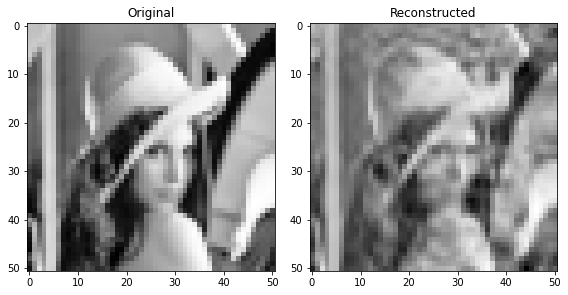

 error for 2601 measurements =  0.064


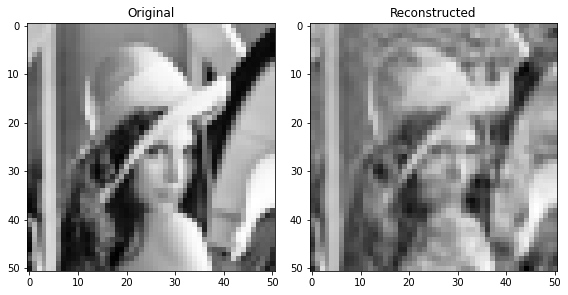

 error for 2601 measurements =  0.064
0.0016594039272481013 0.17344173441734417 0.0009983608369806352
shape of Sigma1 : (51, 1) 
shape of Sigma2 : (51, 51) 
shape of Tau : (51, 1)


<ipython-input-13-34642fcc85cf>:21: RuntimeWarning: divide by zero encountered in true_divide
  sigma2 = ones_v / (norm_grad_x * ones_i)


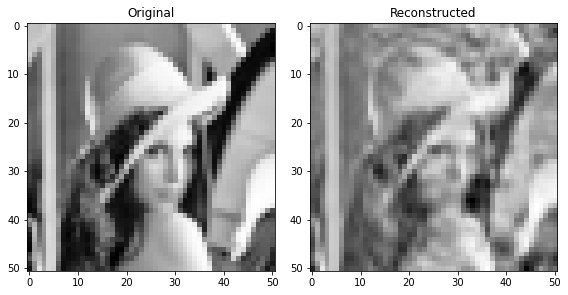

 error for 2601 measurements =  0.067


ValueError: operands could not be broadcast together with shapes (2,2601,1) (51,1) 

In [91]:
image = rescale(color.rgb2gray(plt.imread("lena.png")), scale=0.10, mode="reflect")
theta = np.linspace(0., 180., max(image.shape), endpoint=False)

X2 = np.array(image.reshape(n, 1)).reshape(51, 51)
A2 = radon(image, theta=theta)
R2 = np.matmul(A2, X2)

print('shape of A2 : %s \nshape of R2 : %s \n' %(np.shape(A2), np.shape(R2)))
x_t, x_sol_t = Chambolle_Pock(A2, R2)
show_comparison(image, x_sol_t.reshape(51,51))

x_t_2, x_sol_t_2 = Chambolle_Pock_2(A2, R2)
show_comparison(image, x_sol_t_2.reshape(51,51))

X_t, X_sol_t = Chambolle_Pock_preconditioned(A2, R2)
show_comparison(image, X_sol_t.reshape(51,51))



X_t_2, X_sol_t_2 = Chambolle_Pock_preconditioned_2(A2, R2)
show_comparison(image, X_sol_t_2.reshape(51,51))

show_comparison(x_sol_t.reshape(51,51), x_sol_t_2.reshape(51,51))
show_comparison(X_sol_t.reshape(51,51), X_sol_t_2.reshape(51,51))

### Chambolle pock preconditioned

In [13]:
def Chambolle_Pock_preconditioned(A, R):
    
    A_trans = np.copy(np.transpose(A))
    x = np.matmul(A_trans, R)
    Lambda = 0.05
    
    i, j = np.shape(A)
    m, n = np.shape(R)


    ones_i = np.ones((j, 1))
    ones_d = np.ones((i, 1))
    ones_v = np.ones((i, j))

        
    grad_x = gradient(x)*Lambda
    norm_grad_x = np.sqrt(grad_x[0]**2 + grad_x[1]**2)
    
    
    sigma1 = ones_d / (np.matmul(A, ones_i))
    sigma2 = ones_v / (norm_grad_x * ones_i)
    sigma2[-1] = 0
    
    #tau = ones_i / (np.matmul(abs(A_trans), ones_d) + div(x) * ones_i)
    tau = ones_i / (np.matmul(A_trans, ones_d) + 1)
    print(np.max(sigma1), np.max(sigma2), np.max(tau))
    
        
    x = 0 * np.matmul(A_trans, R)
    p = 0 * grad_x
    q = 0 * R
    x_sol = 0 * x
    theta = 1.0
    n_ite = 500
    
    
    print('shape of Sigma1 : %s \nshape of Sigma2 : %s \nshape of Tau : %s' %(np.shape(sigma1), np.shape(sigma2), np.shape(tau)))
    

    for ite in range(n_ite):
        
        
        #print('\n\tshape of p before', np.shape(p))
        p = proj_l2(p + np.matmul(sigma2, gradient(x_sol)) * Lambda, 1)
        #print('\tshape of p after', np.shape(p))
        
        #print('\n\tshape of q before', np.shape(q), np.shape(np.matmul(A,x_sol)))
        q = (q + sigma1 *(np.matmul(A, x_sol)) - sigma1 * R) /(sigma1 + 1)
        #print('\tshape of q after', np.shape(q))
        
        
        x_old = x
        #print('\n\tshape of x before',np.shape(x), np.shape(div(p)) )
        x = x + tau * div(p) * Lambda - tau * np.matmul(A_trans, q)
        #print('\tshape of x after')
        
        #print('\n\tshape of x_sol before', np.shape(x_sol))
        x_sol = x + theta * (x - x_old)
        #print(p[0])
        #print('\tshape of x_sol after', np.shape(x_sol))
    
    return x, x_sol

## C-P with HAAR wavelet 

In [137]:
image = rescale(color.rgb2gray(plt.imread("lena.png")), scale=0.098, mode="reflect")
i, j = np.shape(image)
n = i*j
r = 1
m = int(n/r)
A = np.array(sensing_matrix(m, n, "bernoulli"))
X = np.array(image.reshape(n, 1))
R = np.matmul(A, X)
print(i, j)
type(image)

50 50


numpy.ndarray

 image shape =  (50, 50)
(7, 7)
(7, 7)
(13, 13)
<class 'dict'>


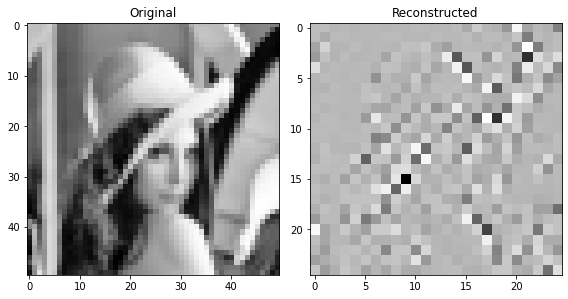

In [315]:
coeffs = pywt.wavedecn(image, wavelet='haar', level=3)
arr, coeff_slices = pywt.coeffs_to_array(coeffs)
print(' image shape = ',np.shape(image))
print(np.shape(coeffs[0]))
print(np.shape(coeffs[1]['da']))
print(np.shape(coeffs[2]['da']))
print(type(coeffs[1]))
show_comparison(image, coeffs[3]['dd'])

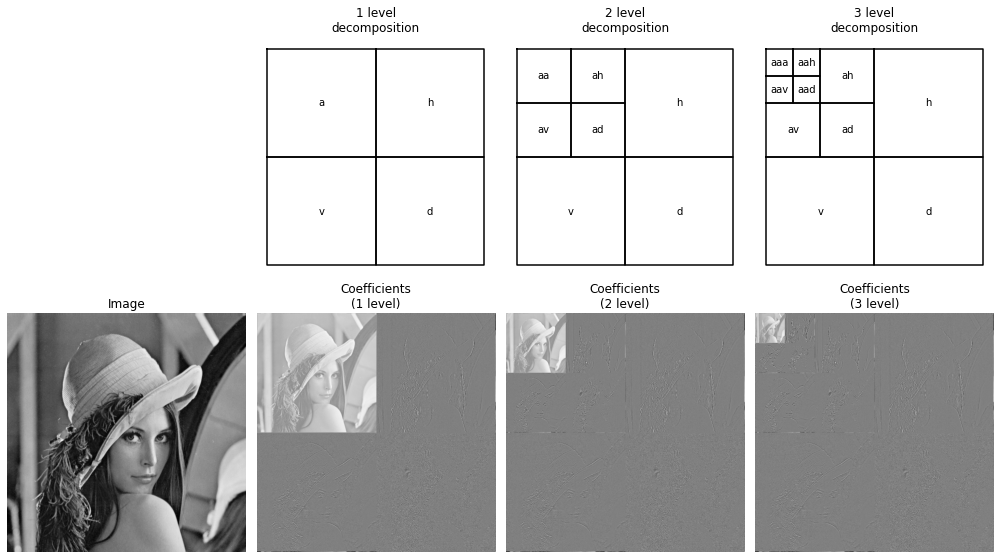

In [16]:
import numpy as np
import pywt
from matplotlib import pyplot as plt
from pywt._doc_utils import wavedec2_keys, draw_2d_wp_basis

x = rescale(color.rgb2gray(plt.imread("lena.png")), scale=1, mode="reflect")
shape = x.shape

max_lev = 3       # how many levels of decomposition to draw
label_levels = 3  # how many levels to explicitly label on the plots

fig, axes = plt.subplots(2, 4, figsize=[14, 8])
for level in range(0, max_lev + 1):
    if level == 0:
        # show the original image before decomposition
        axes[0, 0].set_axis_off()
        axes[1, 0].imshow(x, cmap=plt.cm.gray)
        axes[1, 0].set_title('Image')
        axes[1, 0].set_axis_off()
        continue

    # plot subband boundaries of a standard DWT basis
    draw_2d_wp_basis(shape, wavedec2_keys(level), ax=axes[0, level],
                     label_levels=label_levels)
    axes[0, level].set_title('{} level\ndecomposition'.format(level))

    # compute the 2D DWT
    c = pywt.wavedec2(x, 'db2', mode='periodization', level=level)
    # normalize each coefficient array independently for better visibility
    c[0] /= np.abs(c[0]).max()
    for detail_level in range(level):
        c[detail_level + 1] = [d/np.abs(d).max() for d in c[detail_level + 1]]
    # show the normalized coefficients
    arr, slices = pywt.coeffs_to_array(c)
    axes[1, level].imshow(arr, cmap=plt.cm.gray)
    axes[1, level].set_title('Coefficients\n({} level)'.format(level))
    axes[1, level].set_axis_off()

plt.tight_layout()
plt.show()

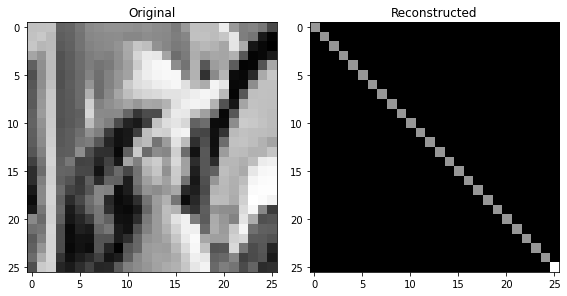

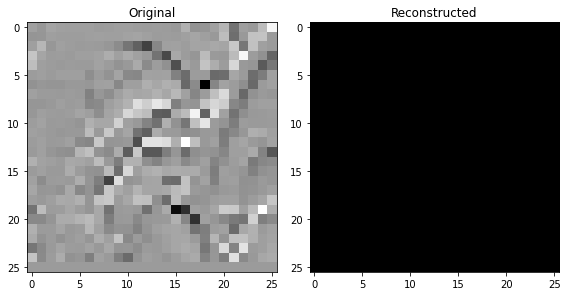

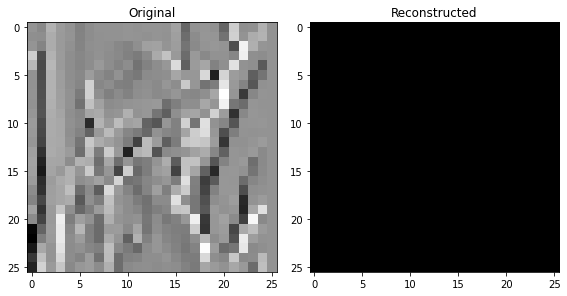

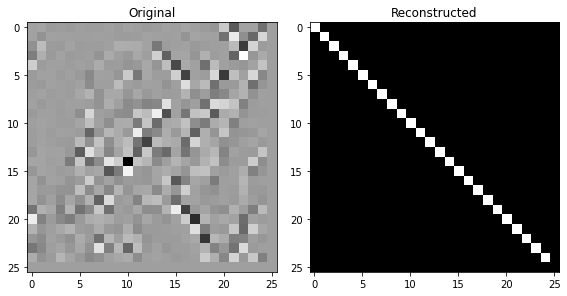

26
(26, 26)


In [395]:
image = rescale(color.rgb2gray(plt.imread("lena.png")), scale=0.098, mode="reflect")
coeffs_image = pywt.wavedecn(image, wavelet='haar', level=1)
arr_image, coeff_slices_image = pywt.coeffs_to_array(coeffs_image)

Id = np.identity(51)
coeffs_Id = pywt.wavedecn(Id, wavelet='haar', level=1)
arr_Id, coeff_slices_Id = pywt.coeffs_to_array(coeffs_Id)


show_comparison(coeffs_image[0], coeffs_Id[0])
show_comparison(coeffs_image[1]['da'], coeffs_Id[1]['da'])
show_comparison(coeffs_image[1]['ad'], coeffs_Id[1]['ad'])
show_comparison(coeffs_image[1]['dd'], coeffs_Id[1]['dd'])
print(len(coeffs_Id[0]))
print(np.shape(coeffs_Id[1]['da']))

#res = np.matmul(coeffs_Id, image)

(512, 512)


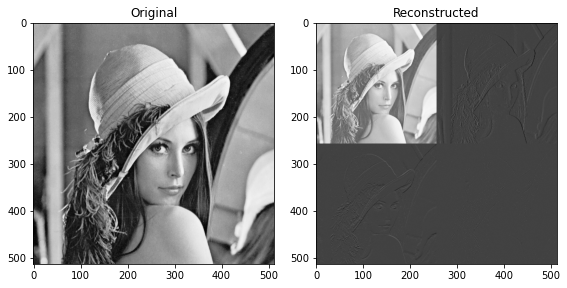

 error for 2500 measurements =  0.536


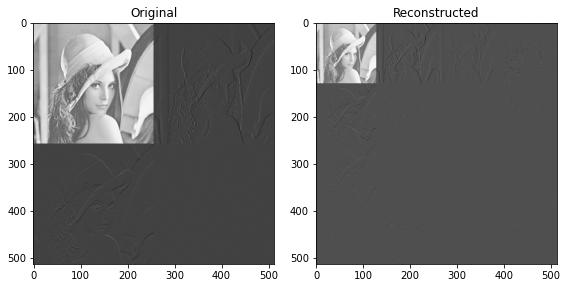

 error for 2500 measurements =  0.536


In [140]:
image = rescale(color.rgb2gray(plt.imread("lena.png")), scale=0.098, mode="reflect")
image = rescale(color.rgb2gray(plt.imread("lena.png")), scale=1, mode="reflect")
print(np.shape(image))
H,H_trans = haar(512)
H_2, H_trans_2 = haar(256)

Y = np.matmul(H, image) # NICE
Z = np.matmul(Y, H_trans)


def wrong_way1():
    image = rescale(color.rgb2gray(plt.imread("lena.png")), scale=1, mode="reflect")
    H,H_trans = haar(512)
    Y = np.matmul(H, image) # NICE
    Z = np.matmul(Y, H_trans)
    Y2 = np.matmul(H, Z)
    Z2 = np.matmul(Y2, H_trans)
    show_comparison(image, Z2)
    return Z2


"""
H_2_final = np.vstack([np.hstack([H_2, H_2]), np.hstack([H_2, H_2])])
H_trans_2_final = np.vstack([np.hstack([H_trans_2, H_trans_2]), np.hstack([H_trans_2, H_trans_2])])



Y_2 = np.matmul(H_2_final, Z)
Z_2 = np.matmul(Y_2, H_trans_2_final)
"""

Y_112 = np.matmul(H_2, Z[0:256, 0:256])
Z_112 = np.matmul(Y_112, H_trans_2)


Y_122 = np.matmul(H_2, Z[0:256, 256:])
Z_122 = np.matmul(Y_122, H_trans_2)


Y_212 = np.matmul(H_2, Z[256:, 0:256])
Z_212 = np.matmul(Y_212, H_trans_2)

Y_222 = np.matmul(H_2, Z[256:, 256:])
Z_222 = np.matmul(Y_222, H_trans_2)


Z_2 = np.vstack([np.hstack([Z_112, Z_122]), np.hstack([Z_212, Z_222])])


show_comparison(image, Z)


show_comparison(Z, Z_2)


#show_comparison(image, Z[256:, 256:])

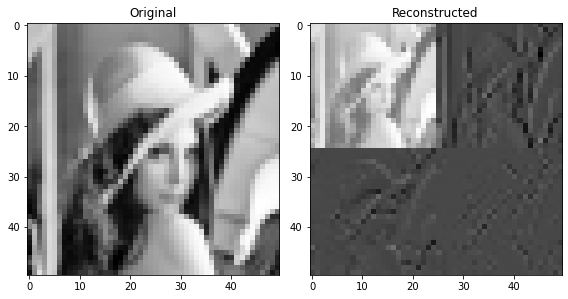

 error for 2500 measurements =  0.518


In [142]:
image = rescale(color.rgb2gray(plt.imread("lena.png")), scale=0.098, mode="reflect")
show_comparison(image, haar_transform(image,50))

In [3]:
def haar(n):
    H = np.zeros((n,n))
    H_trans = np.zeros((n,n))
    half = int(n/2)
    k = 0
    l = 0
    for i in range(half):
        H[i][k] = 0.5
        H[i][k+1] = 0.5
        H[half + i][k] = -0.5
        H[half + i][k+1] = 0.5
        k += 2
        
        H_trans[l][i] = 1
        H_trans[l+1][i] = 1
        H_trans[l][half + i] = -1
        H_trans[l+1][half + i] = 1
        l +=2
        
    return H,H_trans

def haar_transform(X, n):
    H, H_trans = haar(n)
    y = np.matmul(H, X.reshape(n,n))
    X_transforme = np.matmul(y, H_trans)
    return X_transforme


def haar_transform_inverse(X, n):
    H, H_trans = haar(n)
    y = np.matmul(H_trans, X.reshape(n,n))
    X_transforme = np.matmul(y, H)
    return X_transforme


def add_noise(R, sigma):
    mean = 0
    row, col = np.shape(R)
    gauss = np.random.normal(mean, sigma, (row, col))
    gauss = gauss.reshape(row, col)
    R = R + gauss
    return R

  2%|█▋                                                                             | 43/2000 [00:00<00:09, 213.83it/s]

1250.600511588033


100%|█████████████████████████████████████████████████████████████████████████████| 2000/2000 [00:09<00:00, 220.57it/s]


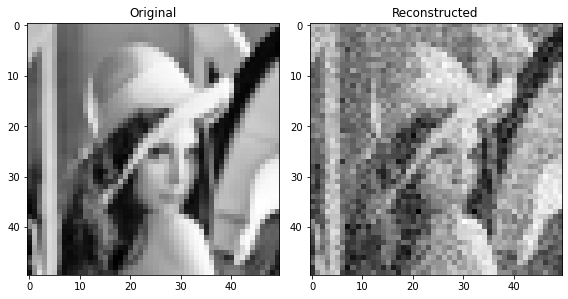

 error for 2500 measurements =  0.059


  1%|▊                                                                              | 21/2000 [00:00<00:09, 208.02it/s]<ipython-input-112-bdf05ef62083>:57: RuntimeWarning: overflow encountered in square
  n = np.maximum(np.sqrt(np.sum(g**2, 0))/Lambda, 1.0)
  2%|█▋                                                                             | 44/2000 [00:00<00:09, 217.28it/s]

1250.600511588033


<ipython-input-195-2ee31216791f>:35: RuntimeWarning: overflow encountered in multiply
  p = proj_l2(p + sigma*x_sol_transform, Lambda)*toto
100%|█████████████████████████████████████████████████████████████████████████████| 2000/2000 [00:09<00:00, 221.56it/s]


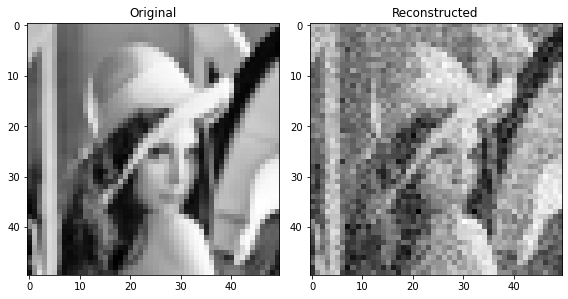

 error for 2500 measurements =  0.059


In [196]:
image = rescale(color.rgb2gray(plt.imread("lena.png")), scale=0.098, mode="reflect")
#image = rescale(color.rgb2gray(plt.imread("lena.png")), scale=1, mode="reflect")


i, j = np.shape(image)
n = i*j
r = 1
m = int(n/r)
A = np.array(sensing_matrix(m, n, "bernoulli"))
X = np.array(image.reshape(n, 1))
R = np.matmul(A, X)

R = add_noise(R,0.2)


x_sol = Chambolle_Pock_Wavelet(A,R,toto=0)
show_comparison(image, x_sol.reshape(50,50))

x_sol = Chambolle_Pock_Wavelet(A,R,toto=1000000)
show_comparison(image, x_sol.reshape(50,50))




#x_sol = Chambolle_Pock_preconditioned_Wavelet(A,R, toto=0)
#show_comparison(image, x_sol.reshape(50,50))

#x_sol = Chambolle_Pock_preconditioned_Wavelet(A,R, toto=1)
#show_comparison(image, x_sol.reshape(50,50))


In [164]:
random.randn(2)

AttributeError: module 'random' has no attribute 'randn'

In [77]:
def f1(m):
    H = np.zeros((m,m))
    for i in range(m):
        H[1][i] = 1
    n = 1
    a = m // 2
    while a >= 1:
        
        b = int(a * 2)
        c = int(1)
        d = int(a)
        while b <= m:
            n += 1
            for i in range(c, d):
                H[n][i] = 1
            for i in range(int(d+1), b):
                H[n][i] = -1
            b = int(b + 2*a)
            c = int(c + 2*a)
            d = int(d + 2*a)
        a = a / 2
    return H

## Important ?

In [4]:
def fn(nn):
    n = nn
    d = 1
    k = 1
    H = np.zeros((n,n))
    H[0] = 1  ##init##
    x = 1
    while d != n :
        offset = 0
        m = int(n / (2* d))
        
        
        for i in range(d):
            H[k,offset:offset + m] = 1 * x
            H[k,offset + m:offset + 2 * m] = -1 * x

            k += 1
            offset += int(n / d)
        m = m * 2
        d = d * 2
    return H

In [5]:
def fn_inv(nn):
    n = nn
    d = 1
    k = 1
    H = np.zeros((n,n))
    H[0] = 1  ##init##
    x = 1
    while d != n :
        offset = 0
        m = int(n / (2* d))
        
        x = d
        for i in range(d):
            H[k,offset:offset + m] = 1 * x
            H[k,offset + m:offset + 2 * m] = -1 * x

            k += 1
            offset += int(n / d)
        m = m * 2
        d = d * 2
    return H.transpose()/nn

In [6]:
def fn(nn):
    n = nn
    d = 1
    k = 1
    H = np.zeros((n,n))
    H[0] = 1  ##init##
    x = 1
    while d != n :
        offset = 0
        m = int(n / (2* d))
        
        if d > 1:
            x = 2**0.5
        
        for i in range(d):
            H[k,offset:offset + m] = 1 * x
            H[k,offset + m:offset + 2 * m] = -1 * x

            k += 1
            offset += int(n / d)
        m = m * 2
        d = d * 2
    return H

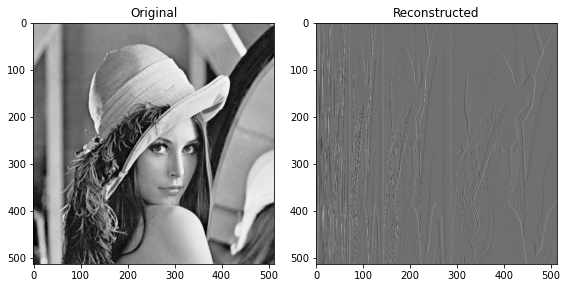

 error for 2500 measurements =  0.499


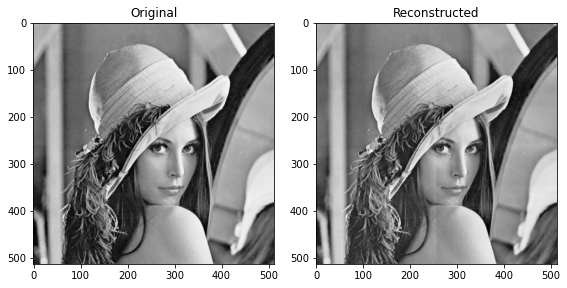

 error for 2500 measurements =  0.074


In [157]:
image = rescale(color.rgb2gray(plt.imread("lena.png")), scale=1, mode="reflect")
H = fn(512)
Hi = fn_inv(512)
r = np.matmul(image, Hi)
r2 = np.matmul(r, H)
show_comparison(image, r)
show_comparison(image, r2)

## DAUBECHIES 

In [7]:
def fd(n):
    a = 0.4830
    b = 0.8365
    c = 0.2241
    d = -0.1294
    
    D = np.zeros((n,n))
    k = 0
    for i in range(n//2):
        D[2*i][k % n] = a
        D[2*i][(k+1) % n] = b
        D[2*i][(k+2) % n] = c
        D[2*i][(k+3) % n] = d
        
        D[2*i+1][k % n] = d
        D[2*i+1][(k+1) % n] = -c
        D[2*i+1][(k+2) % n] = b
        D[2*i+1][(k+3) % n] = -a
        k = k+2
    return D

In [8]:
def filter_0(X, eps=10**-2):
    X = np.where(X < eps, 0,X)
    return X

def rebuild(X):
    n,m = np.shape(X)
    A = np.zeros((n,m))
    k = 0
    l = 0
    
    for i in range(n):
        for j in range(m):
            if X[i][j] != 0:
                A[k][l] = X[i][j]
                l += 1
        k += 1
        l = 0
    return A

def half(X):
    n,m = np.shape(X)
    A = np.zeros((n,m))
    k = 0
    l = 0
    for i in range(n):
        if i % 2 == 1:
            pass
        if i % 2 == 0:
            for j in range(m):
                if j % 2 == 1:
                    pass
                if j % 2 == 0:
                    A[k][l] = X[i][j]
                    l += 1
            k += 1
        l = 0
    return A

def div_40(X):
    n,m = np.shape(X)
    A = np.zeros((n,m))
    M = m // 2
    c = 0
    for i in range(n):
        if (i % 2) == 0:
            for j in range(0,m,2):
                print('in i=%d, X[i][j] = %d' %(i,X[i][j]))
                A[i][j+c] = X[i][j]
                A[i][M+c] = X[i][j+1]
                c +=1
        c = 0    
        if (i % 2) == 3:    
            for j in range(0,m,2):
                print('in i=%d, X[i][j] = %d' %(i,X[i][j]))
                A[i][j] = X[i][j]
                A[i][M+c] = X[i][j+1]

    return A



def fin(X):
    n,m = np.shape(X)
    A = np.zeros((n,m))
    N = n // 2
    M = m // 2
    
    
    l = 0
    for i in range(0,n,2):
        k = 0
        for j in range(0,m,2):
            A[l][k] = X[i][j]
            k += 1
        l +=1
        
    l = 0
    for i in range(1,n,2):
        k = 0
        for j in range(0,m,2):
            A[l+N][k] = X[i][j]
            k += 1
        l +=1
    
    l = 0
    for i in range(0,n,2):
        k = 0
        for j in range(1,m,2):
            A[l][k+M] = X[i][j]
            k += 1
        l +=1
    
    l = 0
    for i in range(1,n,2):
        k = 0
        for j in range(1,m,2):
            A[l+N][k+M] = X[i][j]
            k += 1
        l +=1
    
    
    
    
    return A

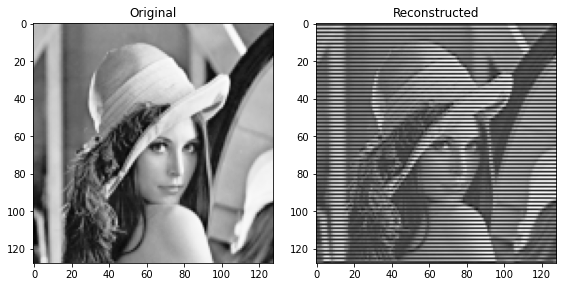

 error for 2500 measurements =  0.378


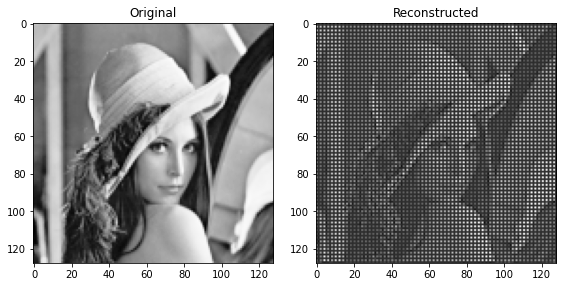

 error for 2500 measurements =  0.496


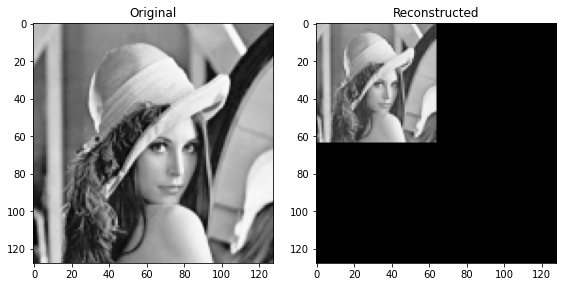

 error for 2500 measurements =  0.529


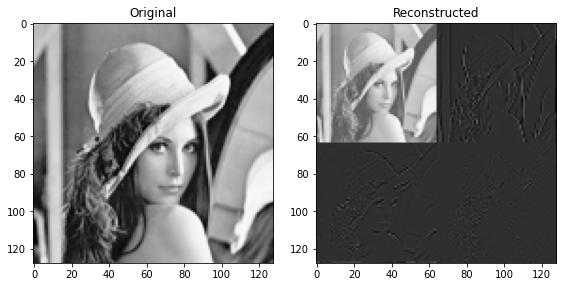

 error for 2500 measurements =  0.530
[[0.99998642 0.4999197  0.4329668  0.86605608]
 [0.4999197  0.99998642 0.86605608 0.4329668 ]
 [0.4329668  0.86605608 0.99998642 0.4999197 ]
 [0.86605608 0.4329668  0.4999197  0.99998642]]


In [296]:
image = rescale(color.rgb2gray(plt.imread("lena.png")), scale=0.25, mode="reflect")
D = fd(128)
r = np.matmul(D, image)
r2 = np.matmul(r, D.transpose())
show_comparison(image, r)
show_comparison(image, r2)

#print(r2[0:10,0:10])

r3 = filter_0(r2, 10**-2)
r3 = half(r2)
show_comparison(image, r3)


show_comparison(image, fin(r2))

d4 = fd(4)
print(np.matmul(abs(d4), abs(d4.transpose())))

In [9]:
def Chambolle_Pock_preconditioned_Wavelet(A, R, iteration=4500, Lambda=0.0001, toto=1):
    H = fd(50)
    H_trans = H.transpose()
    HH = np.matmul(abs(H),abs(H_trans.transpose()))
    HH = np.where(HH==0,1,HH)
    
    A_trans = np.copy(np.transpose(A))
    x = np.matmul(A_trans, R)
    i, j = np.shape(A)
    m, n = np.shape(R)
    print(i,j)
    ones_i = np.ones((j, 1))
    ones_d = np.ones((i, 1))
    ones_v = np.ones((2500, 1))
         
    sigma1 = ones_d / (np.matmul(A, ones_i))
    sigma2 = ones_v / (np.abs(HH).reshape(2500,1) * Lambda)
    tau = ones_i / (np.matmul(A_trans, ones_d) + (Lambda * np.abs(HH)).reshape(2500,1))
    
    #print(np.max(sigma1), np.max(sigma2), np.max(tau), np.shape(tau)) 
        
    x = 0 * np.matmul(A_trans, R)
    p = 0 * R
    q = 0 * x
    x_sol = 0 * x
    theta = 1.0

    print('shape of Sigma1 : %s  max : %s min : %s  average : %s \nshape of Sigma2 : %s max : %s min : %s average :%s\nshape of Tau : %s max : %s min : %s  average : %s' %(np.shape(sigma1), np.max(sigma1), np.min(sigma1), np.average(sigma1), np.shape(sigma2), np.max(sigma2),np.min(sigma2),np.average(sigma2), np.shape(tau), np.max(tau), np.min(tau), np.average(tau)))
    

    for ite in tqdm(range(iteration)):
        
        p = (p + sigma1 *(np.matmul(A, x_sol) - R)) /(sigma1 + 1)
        
        x_sol_transform = np.matmul(H, x_sol.reshape(50,50))
        x_sol_transform = np.matmul(x_sol_transform, H_trans).reshape(2500,1)
        
        q = proj_l2_pre(q + sigma2 * x_sol_transform * Lambda, Lambda) *toto
        x_old = x.copy()
        
        
        inv_q = np.matmul(H_trans, q.reshape(50,50))
        inv_q = np.matmul(inv_q, H).reshape(2500,1)
        
        x = x - tau * np.matmul(A_trans, p) - (tau * inv_q.reshape(2500,1) )*Lambda
        x_sol = x + theta * (x - x_old)
    #print('\nmax A_trans*p : %s \nAverage A_trans * P : %s \nmax div(q) : %s average of div(q) : %s' %(np.max(np.matmul(A_trans, p)),np.average(np.matmul(A_trans, p)), np.max(div(q)), np.average(div(q))))
    
    return x_sol


In [152]:
def Chambolle_Pock_Wavelet(A, R, Lambda=0.05,toto=1):
    i,j = np.shape(A)
    si = int(np.sqrt(i))
    sj = int(np.sqrt(j))
    
    
    A_trans = np.copy(np.transpose(A))
    H = fd(si)
    H_trans = H.transpose()
    x = np.matmul(A_trans, R)
    
    
    
    ite = 1000
    for itt in range(ite):
        e1 = np.matmul(A, x)
        e2 = np.matmul(A_trans, e1)
        e3 = e2 + x

        s = np.sqrt(norm2sq(x))
        x = e3 /s
    L = np.sqrt(s)
    print(L)
    sigma = 1.0 / L
    tau = 1.0 / L
    
    x = 0 * np.matmul(A_trans, R)
    #print('shhape of x',np.shape(x), 'shape of grad x', np.shape(gradient(x)))
    p = 0 * R
    q = np.zeros((i,1))
    x_sol = 0 * x
    theta = 1.0
    n_ite = 2000
    #print('shape of p', np.shape(p))
    
    for it in tqdm(range(n_ite)):
        
        p = (p + sigma*(np.matmul(A,x_sol)) - sigma*R)/(1.0 + sigma)
        
        x_sol_transform = np.matmul(H, x_sol.reshape(si,sj))
        x_sol_transform = np.matmul(x_sol_transform, H_trans).reshape(i,1)
        q = proj_l2(q + sigma*x_sol_transform, Lambda)
        
        x_old = x
        inv_q = np.matmul(H_trans, q.reshape(si,si))
        inv_q = np.matmul(inv_q, H).reshape(i,1)
        x = x - tau*np.matmul(A_trans,p) + tau*inv_q*toto
        x_sol = x + theta * (x - x_old)
    return x_sol

In [84]:
image = rescale(color.rgb2gray(plt.imread("lena.png")), scale=0.098, mode="reflect")
n = np.shape(image)[0] * np.shape(image)[1]
m = n
A = np.array(sensing_matrix(m, n, "bernoulli"))
X = np.array(image.reshape(n, 1))
R = np.matmul(A, X)
#R_N = add_noise(R,0.2)

x_sol1 = Chambolle_Pock_Wavelet(A, R,Lambda=0.05, toto=0)
show_comparison(image,x_sol1.reshape(50,50))

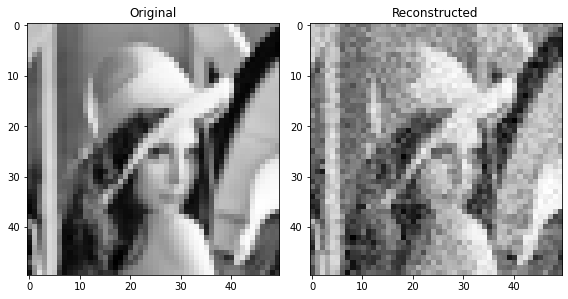

 error for 2500 measurements =  0.046


  2%|█▎                                                                             | 32/2000 [00:00<00:12, 157.92it/s]

1251.1157321086534


100%|█████████████████████████████████████████████████████████████████████████████| 2000/2000 [00:09<00:00, 216.45it/s]


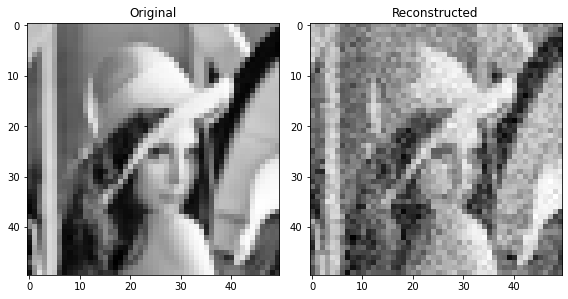

 error for 2500 measurements =  0.052


  1%|▊                                                                              | 21/2000 [00:00<00:09, 208.27it/s]

1251.1157321086534


100%|█████████████████████████████████████████████████████████████████████████████| 2000/2000 [00:09<00:00, 221.28it/s]


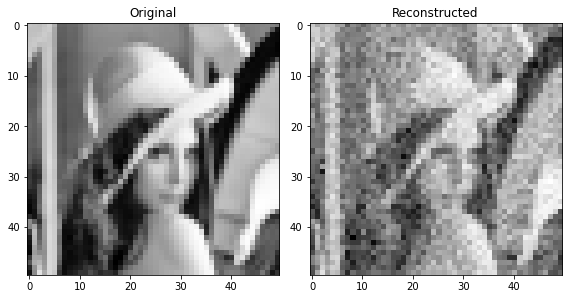

 error for 2500 measurements =  0.060


  1%|▊                                                                              | 20/2000 [00:00<00:10, 193.53it/s]

1251.1157321086534


100%|█████████████████████████████████████████████████████████████████████████████| 2000/2000 [00:09<00:00, 210.14it/s]


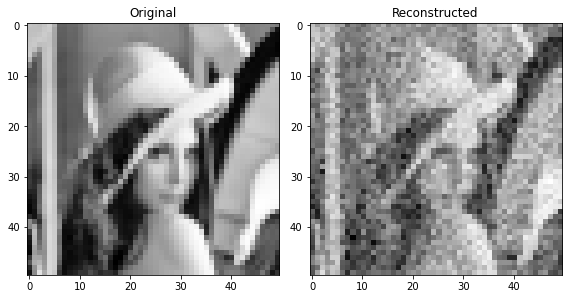

 error for 2500 measurements =  0.071


In [23]:
x_sol1 = Chambolle_Pock_Wavelet(A, R,Lambda=0.05, toto=0)
show_comparison(image,x_sol1.reshape(50,50))

x_sol2 = Chambolle_Pock_Wavelet(A, R,Lambda=0.05, toto=1)
show_comparison(image,x_sol2.reshape(50,50))

x_sol3 = Chambolle_Pock_Wavelet(A, R_N,Lambda=0.05, toto=0)
show_comparison(image,x_sol3.reshape(50,50))

x_sol4 = Chambolle_Pock_Wavelet(A, R_N,Lambda=0.05, toto=1)
show_comparison(image,x_sol4.reshape(50,50))

0.4578459032030433
0.457845269096876


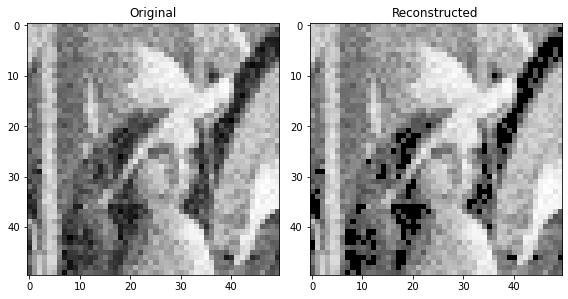

 error for 2500 measurements =  0.045
 number of parse elements :  197


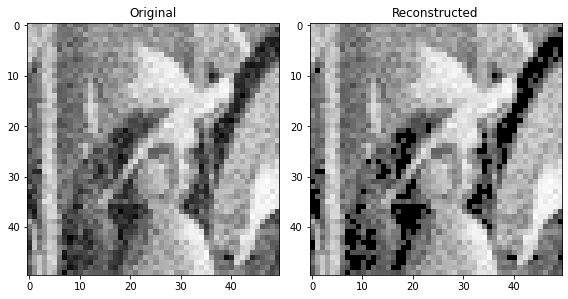

 error for 2500 measurements =  0.046
 number of parse elements :  231


In [71]:

print(np.average(x_sol1))
print(np.average(x_sol2))


sp_1 = sparse(x_sol1, eps = eps).reshape(50,50)
show_comparison(x_sol1.reshape(50,50), sp_1)
print(' number of parse elements : ', count_sparse(x_sol1, eps))

sp_2 = sparse(x_sol2, eps = eps).reshape(50,50)
show_comparison(x_sol2.reshape(50,50), sp_2)
print(' number of parse elements : ', count_sparse(x_sol2, eps))

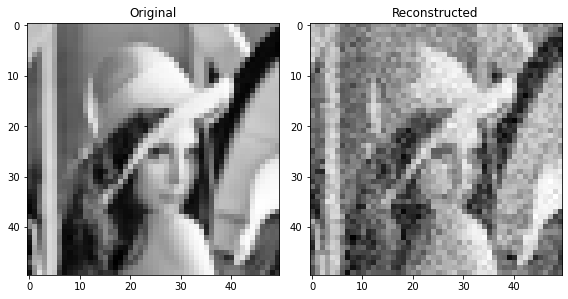

 35%|███████████████████████████▏                                                 | 705/2000 [00:00<00:00, 7032.89it/s]

 error for 2500 measurements =  0.052
(50, 50)
1033.1257


100%|████████████████████████████████████████████████████████████████████████████| 2000/2000 [00:00<00:00, 7421.82it/s]


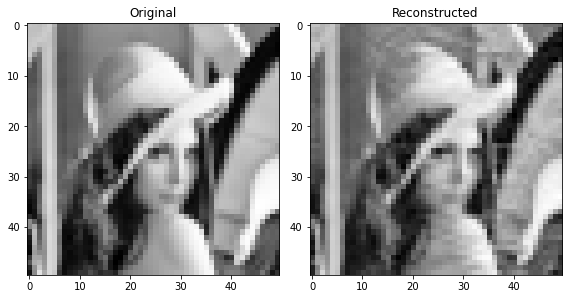

 error for 2500 measurements =  0.025


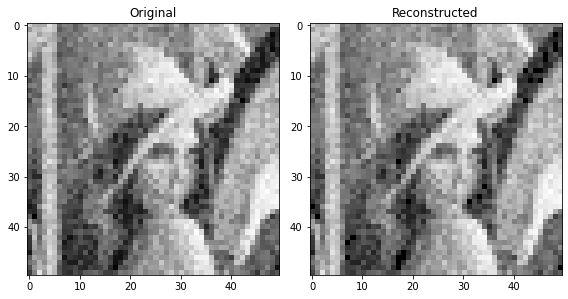

 error for 2500 measurements =  0.008
 number of parse elements :  28


In [92]:
#x_sol5 = Chambolle_Pock_Wavelet(A, R,Lambda=100, toto=1)
show_comparison(image,x_sol2.reshape(50,50))

theta = np.linspace(0., 180., max(image.shape), endpoint=False)
X2 = np.array(image).reshape(50, 50)
A2 = radon(image, theta=theta)
R2 = np.matmul(A2, X2)

print(np.shape(A2))
x_sol6 = Chambolle_Pock_Wavelet(A2, R2,Lambda=100, toto=1)
show_comparison(image,x_sol6.reshape(50,50))


eps = 0.1
sp_5 = sparse(x_sol5, eps = eps).reshape(50,50)
show_comparison(x_sol5.reshape(50,50), sp_5)
print(' number of parse elements : ', count_sparse(x_sol5, eps))

In [58]:
def sparse(image, eps=0.01):
    return np.where(image < eps, 0, image)

In [42]:
def count_sparse(image, eps=0):
    return np.count_nonzero(image <= eps)

In [117]:
xx = np.array([[1,2,6],[3,4,5]])
gx = np.array([[1,-1,0],[0,1,-1],[-1,0,1]])
gy = np.array([[1,0,-1],[-1,1,0],[0,-1,1]])

gx2 = np.array([[0,1,-1],[-1,0,1],[1,-1,0]])
gy2 = np.array([[0,-1,1],[1,0,-1],[-1,1,0]])

gx3 = np.array([[-1],[1]])
print(np.matmul(xx,gx),'\n')
print(np.matmul(xx,gy),'\n')

print(np.matmul(xx,gx2),'\n')
print(np.matmul(xx,gy2),'\n')
print(np.matmul(xx.transpose(), gx3).transpose())

[[-5  1  4]
 [-2  1  1]] 

[[-1 -4  5]
 [-1 -1  2]] 

[[ 4 -5  1]
 [ 1 -2  1]] 

[[-4  5 -1]
 [-1  2 -1]] 

[[ 2  2 -1]]


In [122]:
import random as random

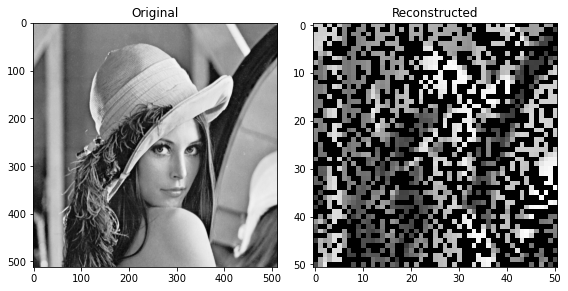

In [156]:
import random as random
def missing_image(im, percent):
    """percent : percentage of pixel to withdraw"""
    image = rescale(color.rgb2gray(plt.imread(im)), scale=0.1, mode="reflect")
    k,l = np.shape(image)
    for i in range(k):
        for j in range(l):
            if randrange(100) < percent:
                image[i][j] = 0
    return image
            
            
image_miss = missing_image('lena.png',50)
plt.imsave('lena_missing_50.png', image_miss, cmap=plt.cm.Greys_r)
image = rescale(color.rgb2gray(plt.imread('lena.png')), scale=1, mode="reflect")
show_comparison(image, image_miss)

In [159]:
image1 = rescale(color.rgb2gray(plt.imread("lena.png")), scale=0.1, mode="reflect")
image = rescale(color.rgb2gray(plt.imread("lena_missing_50.png")), scale=1, mode="reflect")
print(np.shape(image))
n = np.shape(image)[0] * np.shape(image)[1]
m = n
A = np.array(sensing_matrix(m, n, "bernoulli"))
X = np.array(image.reshape(n, 1))
R = np.matmul(A, X)
print(np.shape(A),np.shape(R))
#R_N = add_noise(R,0.2)


<ipython-input-159-3fbbc864b565>:2: FutureWarning: Non RGB image conversion is now deprecated. For RGBA images, please use rgb2gray(rgba2rgb(rgb)) instead. In version 0.19, a ValueError will be raised if input image last dimension length is not 3.
  image = rescale(color.rgb2gray(plt.imread("lena_missing_50.png")), scale=1, mode="reflect")


(51, 51)
(2601, 2601) (2601, 1)


  1%|▊                                                                              | 22/2000 [00:00<00:10, 196.80it/s]

1300.9816528105669


100%|█████████████████████████████████████████████████████████████████████████████| 2000/2000 [00:10<00:00, 199.64it/s]


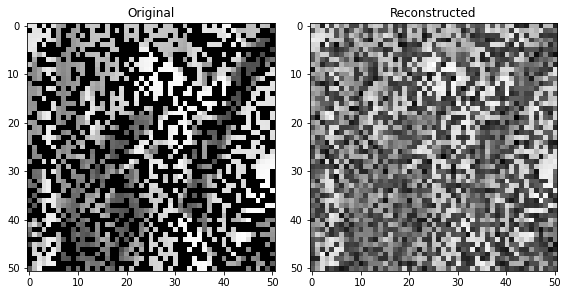

 error for 2601 measurements =  0.106


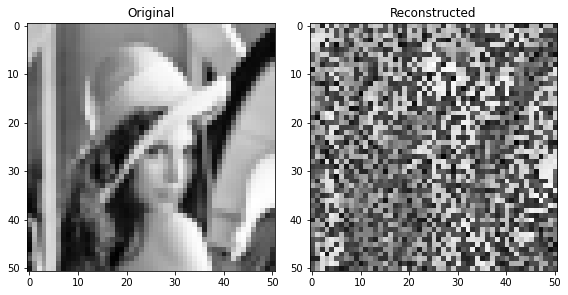

 error for 2601 measurements =  0.392


In [161]:
x_sol1 = Chambolle_Pock_Wavelet(A, R,Lambda=0.05, toto=1)
show_comparison(image,x_sol1.reshape(51,51))
show_comparison(image1,x_sol1.reshape(51,51))

In [165]:
from skimage.data import shepp_logan_phantom
image = shepp_logan_phantom()

<ipython-input-174-f67b4b1a7411>:2: FutureWarning: The behavior of rgb2gray will change in scikit-image 0.19. Currently, rgb2gray allows 2D grayscale image to be passed as inputs and leaves them unmodified as outputs. Starting from version 0.19, 2D arrays will be treated as 1D images with 3 channels.
  image = rescale(color.rgb2gray(image), scale=0.125, mode="reflect")


(50, 50)


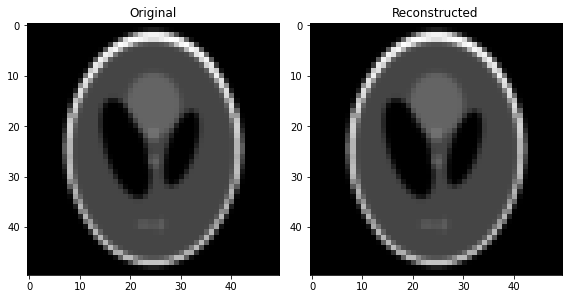

 error for 2601 measurements =  0.000


In [174]:
image = shepp_logan_phantom()
image = rescale(color.rgb2gray(image), scale=0.125, mode="reflect")
print(np.shape(image))
show_comparison(image,image)

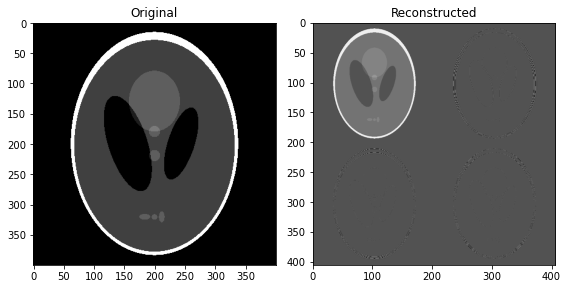

In [183]:
image = shepp_logan_phantom()
x = image
wavelet = 'db4'
coeffs = pywt.wavedecn(x, wavelet=wavelet, level=1)
arr, coeff_slices = pywt.coeffs_to_array(coeffs)
show_comparison(x,arr)

In [242]:
n = 6
m = 4
x = np.arange(n*m).reshape(n,m)
print(x)
batch_l = 3
batch_c = 2
x_final = np.zeros((n,n))
x_loc = np.zeros((batch_l * batch_c,1))

l = 0
c = 0

for i in range(0,n,batch_c):
    for j in range(0,m,batch_l):
        x_loc = x[l+i : l+i+batch_l, c+j:c+j+batch_c]
        #c += batch_c
        print(x_loc)

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]
 [12 13 14 15]
 [16 17 18 19]
 [20 21 22 23]]
[[0 1]
 [4 5]
 [8 9]]
[[ 3]
 [ 7]
 [11]]
[[ 8  9]
 [12 13]
 [16 17]]
[[11]
 [15]
 [19]]
[[16 17]
 [20 21]]
[[19]
 [23]]


In [281]:
n = 6
m = 4
x = np.arange(n*m).reshape(n,m)
y = np.hsplit(x,2,4)
"""for i in range(np.shape(y[0])):
    print(np.h"""
print(x, '\n\n')
print(y, '\n\n')
print(y[0], '\n\n')
z = np.vsplit(y[0],2)
print(z, '\n\n')

TypeError: _hvdsplit_dispatcher() takes 2 positional arguments but 3 were given

In [590]:
def split(im, n_row, n_col):
    '''input :  im : 2D array to split
               n_row : split size in row direction
               n_col : split size in column direction
        returns im_split : 2D array'''
    n,m = np.shape(im)
    
    r = n // n_row
    c = m // n_col
    y = np.hsplit(im,c)
    
    im_split = np.zeros((int(n * m // ( n_row * n_col)), n_row * n_col))
    k = 0
    
    for i in range(np.shape(y)[0]):
        z = np.vsplit(y[i], r)
        for j in range(np.shape(z)[0]):
            w = z[j].reshape(1,n_row*n_col)
            im_split[k] = w
            k += 1
    return im_split


def inv_split(im_split,n,m, n_row, n_col):
    a, b = np.shape(im_split)
    idx = []
    for i in range(a):
        idx.append(im_split[i].reshape(n_row, n_col))
    idx = np.array(idx)
    x_back = np.zeros((n,m))
    
    k = 0
    l = 0
    z = 0
    while z < a:
        while k <= n - n_row:
            x_back[k:k+n_row, l:l+n_col] = idx[z]
            z += 1
            k += n_row
        k = 0
        l += n_col

    return x_back

In [602]:
n = 5
m = 10
x = np.arange(n*m).reshape(n,m)
r = 5
c = 5

print('original x : \n', x, '\n\n')


x_split = split(x,r,c)
print('split : \n',x_split, '\n\n ')
x_back = inv_split(x_split, n, m, r, c)
print('back : \n',x_back, ' \n\n')

#print(x_back, '\n\n')

original x : 
 [[ 0  1  2  3  4  5  6  7  8  9]
 [10 11 12 13 14 15 16 17 18 19]
 [20 21 22 23 24 25 26 27 28 29]
 [30 31 32 33 34 35 36 37 38 39]
 [40 41 42 43 44 45 46 47 48 49]] 


split : 
 [[ 0.  1.  2.  3.  4. 10. 11. 12. 13. 14. 20. 21. 22. 23. 24. 30. 31. 32.
  33. 34. 40. 41. 42. 43. 44.]
 [ 5.  6.  7.  8.  9. 15. 16. 17. 18. 19. 25. 26. 27. 28. 29. 35. 36. 37.
  38. 39. 45. 46. 47. 48. 49.]] 

 
back : 
 [[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9.]
 [10. 11. 12. 13. 14. 15. 16. 17. 18. 19.]
 [20. 21. 22. 23. 24. 25. 26. 27. 28. 29.]
 [30. 31. 32. 33. 34. 35. 36. 37. 38. 39.]
 [40. 41. 42. 43. 44. 45. 46. 47. 48. 49.]]  




In [430]:
n = 6
m = 6
x = np.arange(n*m).reshape(n,m)
r = 3
c = 2
print(x, '\n\n')

x_split = split(x,r,c)
print(x_split, x_split.shape, '\n\n')

idx = [[0,2,4,1,3,5]]
x = x_split.reshape(6,3,2)


print(x,x.shape, '\n\n')
print('et mtn \n',x[idx].reshape(6,6), '\n\n')
print(split(x[idx].reshape(6,6),3,2)[idx])

[[ 0  1  2  3  4  5]
 [ 6  7  8  9 10 11]
 [12 13 14 15 16 17]
 [18 19 20 21 22 23]
 [24 25 26 27 28 29]
 [30 31 32 33 34 35]] 


[[ 0.  1.  6.  7. 12. 13.]
 [18. 19. 24. 25. 30. 31.]
 [ 2.  3.  8.  9. 14. 15.]
 [20. 21. 26. 27. 32. 33.]
 [ 4.  5. 10. 11. 16. 17.]
 [22. 23. 28. 29. 34. 35.]] (6, 6) 


[[[ 0.  1.]
  [ 6.  7.]
  [12. 13.]]

 [[18. 19.]
  [24. 25.]
  [30. 31.]]

 [[ 2.  3.]
  [ 8.  9.]
  [14. 15.]]

 [[20. 21.]
  [26. 27.]
  [32. 33.]]

 [[ 4.  5.]
  [10. 11.]
  [16. 17.]]

 [[22. 23.]
  [28. 29.]
  [34. 35.]]] (6, 3, 2) 


et mtn 
 [[ 0.  1.  6.  7. 12. 13.]
 [ 2.  3.  8.  9. 14. 15.]
 [ 4.  5. 10. 11. 16. 17.]
 [18. 19. 24. 25. 30. 31.]
 [20. 21. 26. 27. 32. 33.]
 [22. 23. 28. 29. 34. 35.]] 


[[ 0.  1.  2.  3.  4.  5.]
 [ 6.  7.  8.  9. 10. 11.]
 [12. 13. 14. 15. 16. 17.]
 [18. 19. 20. 21. 22. 23.]
 [24. 25. 26. 27. 28. 29.]
 [30. 31. 32. 33. 34. 35.]]


<ipython-input-430-2c4d33ec9dce>:16: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  print('et mtn \n',x[idx].reshape(6,6), '\n\n')
<ipython-input-430-2c4d33ec9dce>:17: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  print(split(x[idx].reshape(6,6),3,2)[idx])


In [375]:
help(np.reshape)

Help on function reshape in module numpy:

reshape(a, newshape, order='C')
    Gives a new shape to an array without changing its data.
    
    Parameters
    ----------
    a : array_like
        Array to be reshaped.
    newshape : int or tuple of ints
        The new shape should be compatible with the original shape. If
        an integer, then the result will be a 1-D array of that length.
        One shape dimension can be -1. In this case, the value is
        inferred from the length of the array and remaining dimensions.
    order : {'C', 'F', 'A'}, optional
        Read the elements of `a` using this index order, and place the
        elements into the reshaped array using this index order.  'C'
        means to read / write the elements using C-like index order,
        with the last axis index changing fastest, back to the first
        axis index changing slowest. 'F' means to read / write the
        elements using Fortran-like index order, with the first index
        c